In [1]:

%cd ./yolov5

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v6.2-224-g82a5585 Python-3.9.12 torch-1.13.0+cpu CPU


Setup complete  (12 CPUs, 13.9 GB RAM, 167.4/475.6 GB disk)


In [2]:
import sys

sys.path.append('C:\\Users\\enzop\\AppData\\Roaming\\Python\\Python39\\site-packages')

%cd ../Lamps-Segmentation-5/

from roboflow import Roboflow
rf = Roboflow(api_key="4z9D3PfT9izSbpxxCRP8")
project = rf.workspace("thesis-n4g3v").project("lamps-segmentation")
dataset = project.version(5).download("yolov5")

[WinError 2] The system cannot find the file specified: '../Lamps-Segmentation-5/'
c:\Users\enzop\Desktop\yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Lamps-Segmentation-5 in yolov5pytorch:: 100%|██████████| 9792/9792 [00:04<00:00, 2429.84it/s]


In [3]:
%cd ../yolov5
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

c:\Users\enzop\Desktop\yolov5


In [17]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
#import tensorflow as tf

!python segment/train.py --img 128 --batch 16 --epochs 10 --data C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/data.yaml --weights yolov5s-seg.pt --freeze 20
#display.Image(filename=f'C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/train/images/1202498_l_jpeg.rf.0cce6f01caf05e0dbb3dbc83d38f044b.jpg', width=200)

segment\train: weights=yolov5s-seg.pt, cfg=, data=C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[20], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v6.2-224-g82a5585 Python-3.9.12 torch-1.13.0+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree


        1/9         0G    0.06414    0.03803    0.01862          0         45        128:  47%|████▋     | 125/268 [00:48<00:55,  2.58it/s]
        1/9         0G    0.06411    0.03805    0.01862          0         43        128:  47%|████▋     | 125/268 [00:49<00:55,  2.58it/s]
        1/9         0G    0.06411    0.03805    0.01862          0         43        128:  47%|████▋     | 126/268 [00:49<00:55,  2.54it/s]
        1/9         0G    0.06409    0.03804    0.01862          0         45        128:  47%|████▋     | 126/268 [00:49<00:55,  2.54it/s]
        1/9         0G    0.06409    0.03804    0.01862          0         45        128:  47%|████▋     | 127/268 [00:49<00:54,  2.57it/s]
        1/9         0G    0.06406    0.03803    0.01863          0         46        128:  47%|████▋     | 127/268 [00:50<00:54,  2.57it/s]
        1/9         0G    0.06406    0.03803    0.01863          0         46        128:  48%|████▊     | 128/268 [00:50<00:55,  2.53it/s]
        1/9        

In [22]:
!python segment/val.py --weights runs/train-seg/exp5/weights/best.pt --data C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/data.yaml --img 128

segment\val: data=C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/data.yaml, weights=['runs/train-seg/exp5/weights/best.pt'], batch_size=32, imgsz=128, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5  v6.2-224-g82a5585 Python-3.9.12 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs

val: Scanning 'C:\Users\enzop\Desktop\yolov5\Lamps-Segmentation-5\valid\labels.cache' images and labels... 407 found, 0 missing, 2 empty, 0 corrupt: 100%|██████████| 407/407 [00:00<?, ?it/s]
val: Scanning 'C:\Users\enzop\Desktop\yolov5\Lamps-Segmentation-5\valid\labels.cache' images and labels... 407 found, 0 missing, 2 empty, 0 corrupt: 100%|██████████| 407/407 [00:00<?, ?it/s]

                 Class     Images  Instances  

segment\predict: weights=['runs/train-seg/exp5/weights/best.pt'], source=C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/test/images/243880b_lg-removebg-preview_png.rf.9dbb236635a2580b9c5bd19f383ffcd8.jpg, data=data\coco128.yaml, imgsz=[128, 128], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v6.2-224-g82a5585 Python-3.9.12 torch-1.13.0+cpu CPU

Fusing layers... 
Model summary: 165 layers, 7398422 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 C:\Users\enzop\Desktop\yolov5\Lamps-Segmentation-5\test\images\243880b_lg-removebg-preview_png.rf.9dbb236635a2580b9c5bd19f383ffcd8.jpg: 128x128 2 Lampss, 22.1ms
Speed: 1.0ms pre-process, 22.1ms inference, 1.0m

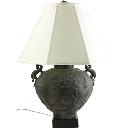

In [25]:

!python segment/predict.py --img 128 --weights runs/train-seg/exp5/weights/best.pt --source C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/test/images/243880b_lg-removebg-preview_png.rf.9dbb236635a2580b9c5bd19f383ffcd8.jpg
display.Image(filename=f'C:/Users/enzop/Desktop/yolov5/Lamps-Segmentation-5/test/images/243880b_lg-removebg-preview_png.rf.9dbb236635a2580b9c5bd19f383ffcd8.jpg', width=200)